## Assignment -1 

#### Team Members :- Araya Messa, Manjula Kottegoda, Rajeev Kumar 
#### Date:- 2017-01-29
#### Section: MSDS 7331 Data Mining - 401


## Describe the purpose of the data set you selected:

Soccer is the most popular sport in the world. Not only is it the dominant sport in parts like South America, Africa 
and Europe; it also enjoys being an integral part of the local culture. Its popularity and strong fan base has resulted in the creation of many professional leagues some dating as far back as 1824(1).  
Today’s soccer leagues are not only highly competitive but also highly lucrative businesses. This is especially true in European soccer leagues.

The dataset we chose contains data from European soccer leagues spanning Season 2008 to 2016. With more than 25000 
matches and 10000 players the dataset is a rich source of data on the games as well as players from the past seasons. 
With the enormous economic impact of soccer such data is gathered for a variety of purposes spanning from building 
prediction models to helping in contract negotiations to scouting players.
 
With this Dataset we will analyze key factors that could be used to predict the outcome of a match. How home field 
advantage differs from league to league, which leagues are more predictable than others. Also perform player analysis 
such as understanding which skill sets are more valuable in being an elite player even within the professional ranks. 
We will also look at any abnormal patterns that might indicate illegal activity such as match fixing. Finally look at 
how to assemble a winning team at the lowest cost. All the models will be tested against the current data to validate 
accuracy.

## Data Understanding - Describe the meaning and type of data for each attribute in the data file

The dataset consists of a SQLite database. The description of all 25,000 matches and 10,000 players of the data can be found at https://www.kaggle.com/hugomathien/soccer. It can be noticed that some players are missing from the lineup (NULL values). This is because the dataset preparer had not been able to source their attributes from FIFA. For that we dropped the attributes with null values from our analysis. 
The SQLite database includes the following tables and explanations:
 
#### Country
Consists of the countries that participates in the 10 European leagues that makes up the dataset
 
#### League
List of 10 European leagues such as English Premier League , Bundesliga and Spanish LIGA
 
#### Match
This is a large data table consisting of almost 25,000 matches played between 2008-2016 seasons. The dataset is rich in information that covers a wide variety of attributes as well as betting odds set forth that major bookies across the globe. Some interesting attributes of this dataset consists of the following:

#### League
Season
Home Team Score
Away Team Score
All players : All players in lineup
Goal attempt details: XML data consisting of players who attempted to score with result
Penalties
 
#### Player
This tables gives some basic statistics of the players such as,
Name
Player IDs
Birthday to derive age
Weight
Height
 
#### Player Attributes
This table breaks down the players into minute details on a multitude of physical and skill attributes. Following are some interesting attributes in this table:
Overall Rating of player
Potential of player
Left-footed or Right-footed
Crossing
Heading accuracy
Dribbling
Various Kicking accuracies
Ball control
Speed
Stamina
Balance
Aggression
Various Defensive traits

#### Team
Teams names

#### Team Attributes
Lists a variety of offensive and defensive attributes as well as some classifications
buildUpPlaySpeed
buildUpPlaySpeedClass
buildUpPlayDribbling
buildUpPlayDribblingClass
buildUpPlayPassing
buildUpPlayPassingClass
buildUpPlayPositioningClass
chanceCreationPassing
chanceCreationPassingClass
chanceCreationCrossing
chanceCreationCrossingClass
chanceCreationShooting
chanceCreationShootingClass
chanceCreationPositioningClass
defencePressure

# Verify Data Quality

The data for soccer league is of a very high quality. We observed that we had values for the most of the important attributes that we were intersted in this case study. 
In our analysis, we used the following attributes Home Team Score, Away Team Score, Home team API Id, Away team API id, country id, league id, height, weight, age , stamina , ball control etc. As said earlier, if there is "NA" in the dataset we dropped it from our analysis for the reason that there were not enough information to fill those nulls. Our analysis is commented with in the contents rather than writing several paragraphs separately.  We cleaned, explored, and organized the data using the following data cleaning process. 

### Import Data From SQLite to Python 

In [1]:
## Reading Data from SQLite3 with Pandas

import sqlite3
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
#Define Connection Object "con" to connect to sqllite database
con = sqlite3.connect('data/database.sqlite') 
#List files in the directory "data" 
#print(check_output(["ls","data"]).decode("utf8"))



In [2]:
# Create Data Frame with Player Ranking, physical and skills attributes
df1 = pd.read_sql('SELECT player_name,avg(agility) as agility,avg(reactions) as reactions,avg(stamina) as stamina,avg(height) as height, avg(weight) as weight,cast((julianday("now")-JulianDay(birthday))/365 As Integer) as age, avg(Overall_rating)  as Overall_rating ,avg(dribbling) as dribbling,avg(ball_control) as ball_control, avg(balance) as balance FROM Player Inner Join Player_attributes On Player.player_api_id=Player_attributes.player_api_id Group By player_name ', con)  # the table name is Match

# Player Attributes. Only Agility and Balance attributes had Na values. We dropped them from our analysis.
print(df1.head())
print("\n Player Attributes : NA row count")
print("Age",df1.age.isnull().sum().sum())
print("Agility",df1.agility.isnull().sum().sum())
print("Reactions",df1.reactions.isnull().sum().sum())
print("Stamina",df1.stamina.isnull().sum().sum())
print("Height",df1.height.isnull().sum().sum())
print("Dribbling",df1.dribbling.isnull().sum().sum())
print("Ball Control",df1.ball_control.isnull().sum().sum())
print("Balance",df1.balance.isnull().sum().sum())


          player_name    agility  reactions    stamina  height  weight  age  \
0  Aaron Appindangoye  59.000000  46.600000  54.000000  182.88   187.0   24   
1     Aaron Cresswell  75.242424  67.848485  72.878788  170.18   146.0   27   
2         Aaron Doran  77.615385  50.346154  70.923077  170.18   163.0   25   
3       Aaron Galindo  62.826087  58.217391  55.434783  182.88   198.0   34   
4        Aaron Hughes  50.760000  69.400000  66.480000  182.88   154.0   37   

   Overall_rating  dribbling  ball_control    balance  
0       63.600000  50.600000     48.600000  65.000000  
1       66.969697  61.090909     61.787879  84.727273  
2       67.000000  69.038462     68.615385  80.730769  
3       69.086957  55.565217     63.173913  44.086957  
4       73.240000  50.600000     60.160000  64.160000  

 Player Attributes : NA row count
Age 0
Agility 458
Reactions 0
Stamina 0
Height 0
Dribbling 0
Ball Control 0
Balance 458


In [3]:
#Create Dataframe df for all maches
df = pd.read_sql('SELECT * FROM Match', con)  # the table name is Match
#print top 5 matches
df.head()



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [4]:
#Define Cursor "cur" for DB connection
cur = con.cursor()
# Below commands create the list of countries, matches, leagues and teams
countries = cur.execute('select id,name from Country').fetchall()
matches = cur.execute("SELECT * from Match").fetchall()
leagues = cur.execute("SELECT * from League").fetchall()
teams = cur.execute("SELECT * from Team").fetchall()
#countries
#teams


# Simple Statistics 

Simple statistics for top players whose rating>84. **Lionel Messi** and **Christiano Ronaldo** are top ranking players. We would be exploring correlation between ranking and player attributes in the following sections.

In [5]:
# Create Data Frame with Player Ranking, physical and skills attributes
df1 = pd.read_sql('SELECT player_name,avg(agility) as agility,avg(reactions) as reactions,avg(stamina) as stamina,avg(height) as height, avg(weight) as weight,cast((julianday("now")-JulianDay(birthday))/365 As Integer) as age, avg(Overall_rating)  as Overall_rating ,avg(dribbling) as dribbling,avg(ball_control) as ball_control, avg(balance) as balance FROM Player Inner Join Player_attributes On Player.player_api_id=Player_attributes.player_api_id Group By player_name ', con)  # the table name is Match

#Drop NA records from the Dataframe
df1.dropna(inplace=True)

#Select Top Players whose rating is >84
df_top_player=df1[df1.Overall_rating>84]

#Print Top 5 Players
print(df_top_player.sort_values(by='Overall_rating',ascending=False).head())

# Simple Statitics of Top Player
print(df_top_player.describe())

              player_name    agility  reactions    stamina  height  weight  \
6053         Lionel Messi  94.384615  92.538462  77.538462  170.18   159.0   
1958    Cristiano Ronaldo  92.960000  88.160000  87.600000  185.42   176.0   
3438        Franck Ribery  91.583333  86.041667  74.166667  170.18   159.0   
723        Andres Iniesta  86.440000  89.320000  77.720000  170.18   150.0   
10827  Zlatan Ibrahimovic  82.285714  82.666667  75.714286  195.58   209.0   

       age  Overall_rating  dribbling  ball_control    balance  
6053    29       92.192308  96.461538     95.769231  92.230769  
1958    32       91.280000  92.640000     93.960000  74.320000  
3438    33       88.458333  92.916667     91.458333  89.291667  
723     32       88.320000  90.080000     92.960000  86.040000  
10827   35       88.285714  89.380952     91.238095  60.476190  
         agility  reactions    stamina      height      weight        age  \
count  35.000000  35.000000  35.000000   35.000000   35.000000  

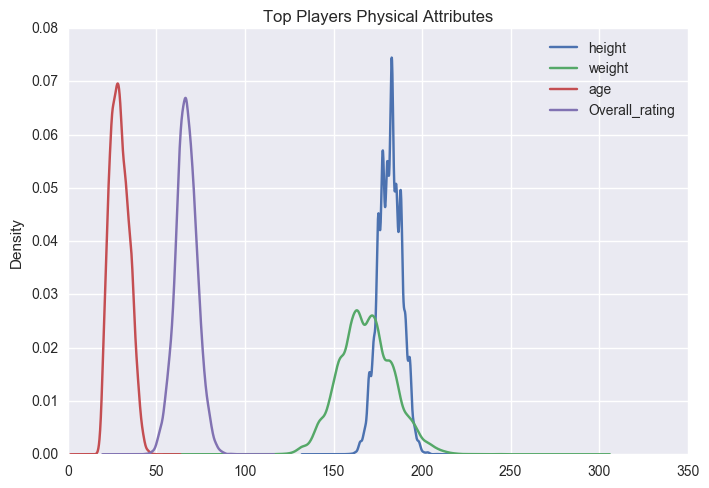

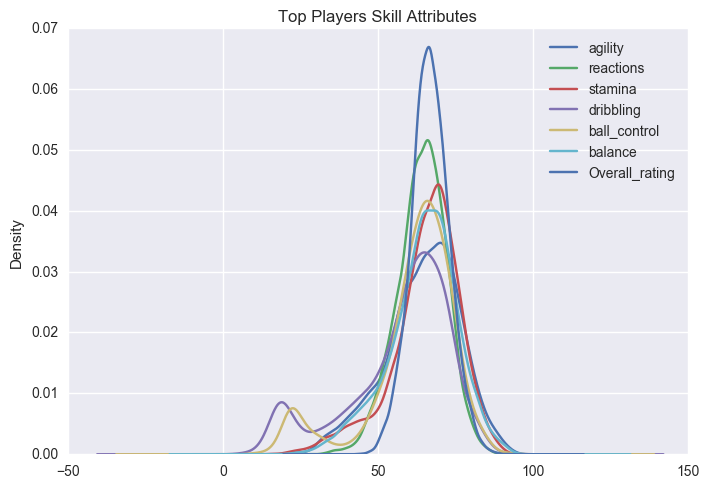

In [6]:
plt.figure()

#Data Frame with Physical Attributes
df_top_player_physical_attributes=df1[['player_name','height','weight','age','Overall_rating']]

#Data Frame with Skill Attributes
df_top_player_skill_attributes=df1[['player_name','agility','reactions','stamina','dribbling','ball_control','balance','Overall_rating']]

#Density Plot for Physical Attributes
df_top_player_physical_attributes.plot(kind='kde')
plt.title('Top Players Physical Attributes')
plt.show()

plt.figure()
#Density Plot for Skill Attributes
df_top_player_skill_attributes.plot(kind='kde')
plt.title('Top Players Skill Attributes')
plt.show()

#### From the above physical density plot for top players, it is evident that ideal weight to be top in soccer is 160 to 170 pounds.
#### From the above skill density plot for top players, agility should be around 70, reactions should be around 65, balance should be around 70. 

Association Between Player Ranking and Age
(0.38680436910736293, 0.0)
Association Between Player Ranking and Weight
(0.1005480177472889, 9.2482450576092328e-25)
Association Between Player Ranking and Height
(0.0055050735122534108, 0.57474551730137824)
Association Between Player Ranking and Dribbling
(0.31266172271931636, 2.2268523570461423e-234)
Association Between Player Ranking and Ball_Control
(0.41995972309541846, 0.0)
Association Between Player Ranking and Balance
(0.17030383682601033, 1.8614006719110508e-68)
Association Between Player Ranking and Agility
(0.24417302156188886, 6.9497857410791837e-141)
Association Between Player Ranking and Stamina
(0.31423745176431728, 7.489816866466807e-237)
Association Between Player Ranking and Reactions
(0.79648776591174519, 0.0)


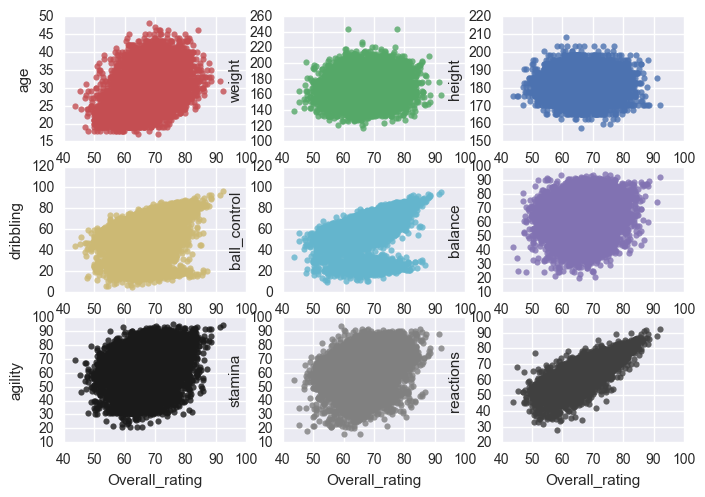

In [7]:
import scipy
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

# Scatter Plots between player atrributes and ranking
sns.regplot(x="Overall_rating",y="age",fit_reg=False,scatter=True,color='r',data=df1,ax=ax1)
sns.regplot(x="Overall_rating",y="weight",fit_reg=False,scatter=True,color='g',data=df1,ax=ax2)
sns.regplot(x="Overall_rating",y="height",fit_reg=False,scatter=True,color='b',data=df1,ax=ax3)
sns.regplot(x="Overall_rating",y="dribbling",fit_reg=False,scatter=True,color='y',data=df1,ax=ax4)
sns.regplot(x="Overall_rating",y="ball_control",fit_reg=False,scatter=True,color='c',data=df1,ax=ax5)
sns.regplot(x="Overall_rating",y="balance",fit_reg=False,scatter=True,color='m',data=df1,ax=ax6)
sns.regplot(x="Overall_rating",y="agility",fit_reg=False,scatter=True,color='k',data=df1,ax=ax7)
sns.regplot(x="Overall_rating",y="stamina",fit_reg=False,scatter=True,color='0.5',data=df1,ax=ax8)
sns.regplot(x="Overall_rating",y="reactions",fit_reg=False,scatter=True,color='0.25',data=df1,ax=ax9)

# Correlation coefficients between player atrributes and ranking
print("Association Between Player Ranking and Age")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.age))

print("Association Between Player Ranking and Weight")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.weight))

print("Association Between Player Ranking and Height")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.height))

print("Association Between Player Ranking and Dribbling")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.dribbling))

print("Association Between Player Ranking and Ball_Control")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.ball_control))

print("Association Between Player Ranking and Balance")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.balance))

print("Association Between Player Ranking and Agility")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.agility))

print("Association Between Player Ranking and Stamina")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.stamina))

print("Association Between Player Ranking and Reactions")
print(scipy.stats.pearsonr(df1.Overall_rating,df1.reactions))

plt.show()



#### From above correlation plots and correlation coefficient, it is clear that rating of top players is highly correlated with Reactions (R=0.79) and Ball Control(R=0.41).

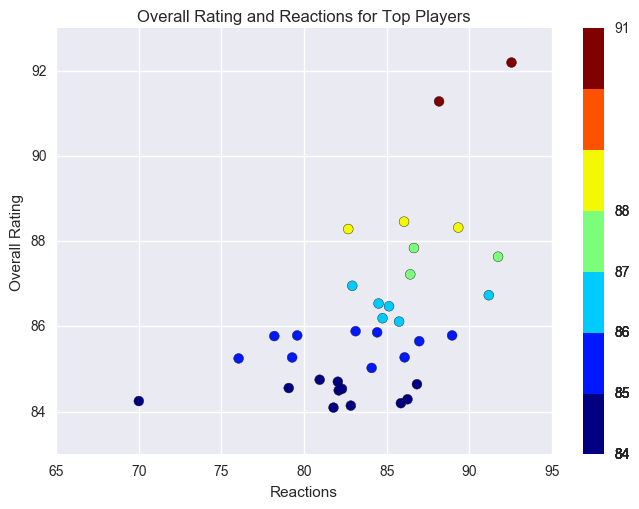

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from matplotlib import cm
from numpy import linspace
plt.figure()

label = df_top_player.Overall_rating.astype(int) 

# Define a colormap with the right number of colors
cmap = plt.cm.get_cmap('jet',len(label))

bounds = range(int(min(label)) ,int(max(label)))
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.scatter(df_top_player.reactions,df_top_player.Overall_rating,c=label, s=50, cmap=cmap, norm=norm)

# Chart title
plt.title('Overall Rating and Reactions for Top Players')

# y label
plt.ylabel('Overall Rating')

# x label
plt.xlabel('Reactions')
# Add a colorbar. 
cb=plt.colorbar(ticks=np.array(label))

plt.show()

#### Above scatter plot suggests that top ranking soccer players tend to score high on reactions skill. 

### Team Attribute Statistics 

  buildUpPlaySpeedClass  COUNT
0              Balanced   1184
1                  Fast    172
2                  Slow    102
  buildUpPlayDribblingClass  COUNT
0                    Little   1004
1                      Lots     21
2                    Normal    433
  buildUpPlayPassingClass  COUNT
0                    Long     94
1                   Mixed   1236
2                   Short    128
  buildUpPlayPositioningClass  COUNT
0                   Free Form     72
1                   Organised   1386
  chanceCreationPassingClass  COUNT
0                     Normal   1231
1                      Risky    171
2                       Safe     56
  chanceCreationCrossingClass  COUNT
0                      Little     52
1                        Lots    211
2                      Normal   1195
  chanceCreationShootingClass  COUNT
0                      Little     37
1                        Lots    197
2                      Normal   1224
  chanceCreationPositioningClass  COUNT
0            

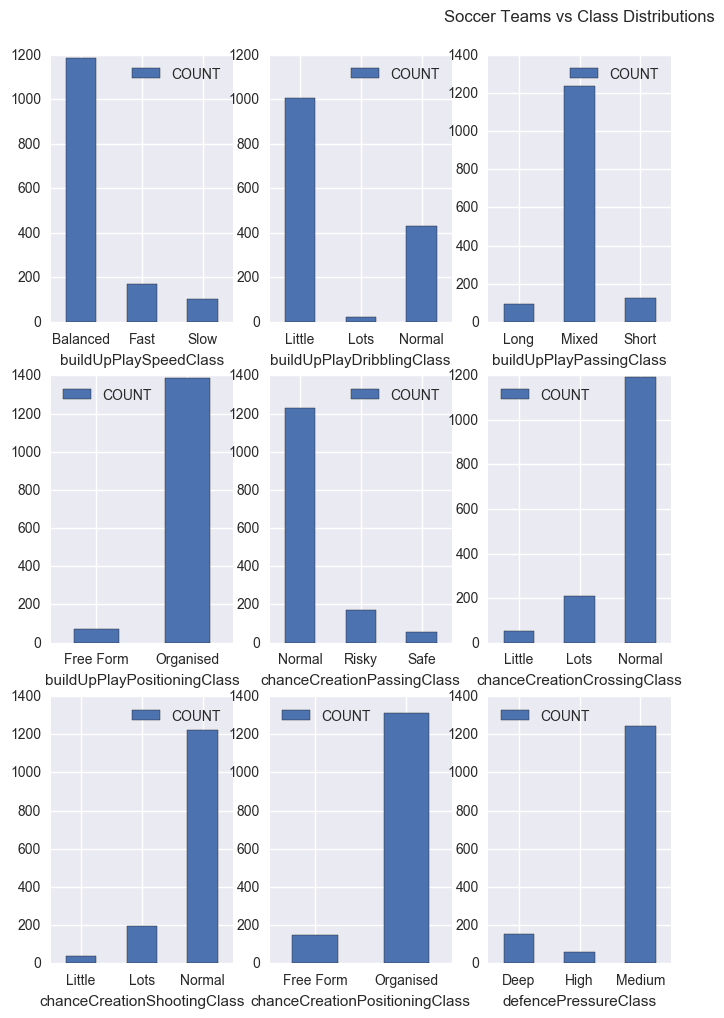

In [9]:
import matplotlib.pyplot as plt
plt.figure()

df_buildUpPlaySpeedClass = pd.read_sql('select buildUpPlaySpeedClass, count(buildUpPlaySpeedClass) AS COUNT from team_attributes group by buildUpPlaySpeedClass',con)
df_buildUpPlayDribblingClass = pd.read_sql('select buildUpPlayDribblingClass, count(buildUpPlayDribblingClass) AS COUNT from team_attributes group by buildUpPlayDribblingClass',con)
df_buildUpPlayPassingClass = pd.read_sql('select buildUpPlayPassingClass, count(buildUpPlayPassingClass)  AS COUNT from team_attributes group by buildUpPlayPassingClass',con)
df_buildUpPlayPositioningClass = pd.read_sql('select buildUpPlayPositioningClass, count(buildUpPlayPositioningClass)  AS COUNT from team_attributes group by buildUpPlayPositioningClass',con)
df_chanceCreationPassingClass = pd.read_sql('select chanceCreationPassingClass, count(chanceCreationPassingClass)  AS COUNT from team_attributes group by chanceCreationPassingClass',con)
df_chanceCreationCrossingClass = pd.read_sql('select chanceCreationCrossingClass, count(chanceCreationCrossingClass)  AS COUNT from team_attributes group by chanceCreationCrossingClass',con)
df_chanceCreationShootingClass = pd.read_sql('select chanceCreationShootingClass, count(chanceCreationShootingClass)  AS COUNT from team_attributes group by chanceCreationShootingClass',con)
df_chanceCreationPositioningClass = pd.read_sql('select chanceCreationPositioningClass, count(chanceCreationPositioningClass)  AS COUNT from team_attributes group by chanceCreationPositioningClass',con)
df_defencePressureClass = pd.read_sql('select defencePressureClass, count(defencePressureClass)  AS COUNT from team_attributes group by defencePressureClass',con)
df_defenceAggressionClass = pd.read_sql('select defenceAggressionClass, count(defenceAggressionClass)  AS COUNT from team_attributes group by defenceAggressionClass',con)
df_defenceDefenderLineClass = pd.read_sql('select defenceDefenderLineClass, count(defenceDefenderLineClass)  AS COUNT from team_attributes group by defenceDefenderLineClass',con)

#sns.distplot(df_buildUpPlaySpeedClass,hist = False,kde_kws={"shade": True},hist_kws={"linewidth": 0.025})    
fig = plt.figure()
fig.set_figheight(20)

ax1 = fig.add_subplot(531)
ax2 = fig.add_subplot(532)
ax3 = fig.add_subplot(533)
ax4 = fig.add_subplot(534)
ax5 = fig.add_subplot(535)
ax6 = fig.add_subplot(536)
ax7 = fig.add_subplot(537)
ax8 = fig.add_subplot(538)
ax9 = fig.add_subplot(539)

print(df_buildUpPlaySpeedClass)
df_buildUpPlaySpeedClass.plot(kind='bar',x="buildUpPlaySpeedClass",y="COUNT",ax=ax1)
ax1.set_xticklabels( df_buildUpPlaySpeedClass.buildUpPlaySpeedClass, rotation=0) 

print(df_buildUpPlayDribblingClass)
df_buildUpPlayDribblingClass.plot(kind='bar',x="buildUpPlayDribblingClass",y="COUNT",ax=ax2)
ax2.set_xticklabels( df_buildUpPlayDribblingClass.buildUpPlayDribblingClass, rotation=0) 

print(df_buildUpPlayPassingClass)
df_buildUpPlayPassingClass.plot(kind='bar',x="buildUpPlayPassingClass",y="COUNT",ax=ax3)
ax3.set_xticklabels( df_buildUpPlayPassingClass.buildUpPlayPassingClass, rotation=0) 

print(df_buildUpPlayPositioningClass)
df_buildUpPlayPositioningClass.plot(kind='bar',x="buildUpPlayPositioningClass",y="COUNT",ax=ax4)
ax4.set_xticklabels( df_buildUpPlayPositioningClass.buildUpPlayPositioningClass, rotation=0) 

print(df_chanceCreationPassingClass)
df_chanceCreationPassingClass.plot(kind='bar',x="chanceCreationPassingClass",y="COUNT",ax=ax5)
ax5.set_xticklabels( df_chanceCreationPassingClass.chanceCreationPassingClass, rotation=0) 

print(df_chanceCreationCrossingClass)
df_chanceCreationCrossingClass.plot(kind='bar',x="chanceCreationCrossingClass",y="COUNT",ax=ax6)
ax6.set_xticklabels( df_chanceCreationCrossingClass.chanceCreationCrossingClass, rotation=0) 

print(df_chanceCreationShootingClass)
df_chanceCreationShootingClass.plot(kind='bar',x="chanceCreationShootingClass",y="COUNT",ax=ax7)
ax7.set_xticklabels(df_chanceCreationShootingClass.chanceCreationShootingClass, rotation=0) 

print(df_chanceCreationPositioningClass)
df_chanceCreationPositioningClass.plot(kind='bar',x="chanceCreationPositioningClass",y="COUNT",ax=ax8)
ax8.set_xticklabels( df_chanceCreationPositioningClass.chanceCreationPositioningClass, rotation=0) 

print(df_defencePressureClass)
df_defencePressureClass.plot(kind='bar',x="defencePressureClass",y="COUNT",ax=ax9)
ax9.set_xticklabels( df_defencePressureClass.defencePressureClass, rotation=0) 

# Chart title
plt.title('Soccer Teams vs Class Distributions',y=3.5)

plt.show()




#### The histograms above show various team classification attributes. These distributions clearly show that the majority of the teams have very similar preferences.

#### We modelled the Home winning advantage anaysis based on 
https://www.kaggle.com/drgilermo/d/hugomathien/soccer/home-advantage-by-country

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


England    Home Win: 0.46    Draw: 0.26    Away Win: 0.29    Average Difference: 0.39
France    Home Win: 0.45    Draw: 0.28    Away Win: 0.27    Average Difference: 0.36
Germany    Home Win: 0.45    Draw: 0.24    Away Win: 0.3    Average Difference: 0.35
Italy    Home Win: 0.47    Draw: 0.26    Away Win: 0.27    Average Difference: 0.38
Spain    Home Win: 0.49    Draw: 0.23    Away Win: 0.28    Average Difference: 0.5


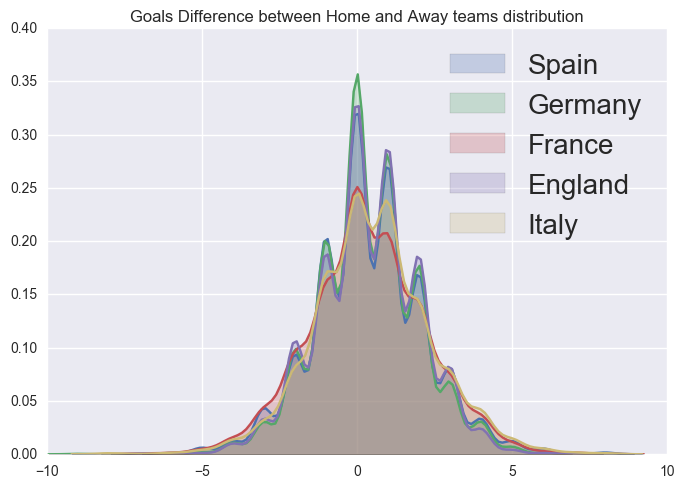

In [10]:
plt.figure()
plt.hold(True)
county_names = []
Home_factor = np.zeros(len(countries))
Home_dict = dict()
Away_dict = dict()
Draw_dict = dict()

for j,row in enumerate(countries):
    goals_home_list = []
    goals_away_list = []
    #Create goals_home and goals_away list of tuples
    goals_home = cur.execute('select home_team_goal from Match where country_id =' + str(row[0])).fetchall()
    goals_away = cur.execute('select away_team_goal from Match where country_id =' + str(row[0])).fetchall()
    #print(goals_home)
    #print(list(enumerate(goals_home)))
    #print(goals_home[:][0][0])
    #Create goals_home and goals_away list of goals(integer)
    for i,game in enumerate(goals_home):
        goals_home_list.append(goals_home[:][i][0])
        goals_away_list.append(goals_away[:][i][0])
    
    #print(goals_home_list)
    #print(type(goals_home_list[0]))
    #print(len(goals_home_list))
    Diff =  np.array(goals_home_list) - np.array(goals_away_list)
    Home_pct = np.true_divide(len(Diff[Diff>0]),len(Diff))
    Away_pct = np.true_divide(len(Diff[Diff<0]),len(Diff))
    Draw_pct = np.true_divide(len(Diff[Diff == 0]),len(Diff))
    
    #print(Home_pct)
    Home_dict[row[1]] = Home_pct
    Away_dict[row[1]] = Away_pct
    Draw_dict[row[1]] = Draw_pct
    
    if (row[1] == 'Spain') | (row[1] == 'Germany') | (row[1] == 'France') | (row[1] == 'England') | (row[1] == 'Italy'):
        sns.distplot(Diff,hist = False,kde_kws={"shade": True},hist_kws={"linewidth": 0.025})
        
        print(row[1], '   Home Win:', round(Home_pct,2), '   Draw:', round(Draw_pct,2),'   Away Win:', round(Away_pct,2), '   Average Difference:',round(np.mean(Diff),2))

plt.legend(['Spain', 'Germany','France','England','Italy'], fontsize = 20)
plt.xlim([-10,10])
plt.title('Goals Difference between Home and Away teams distribution')
plt.show()


### It shows in Spainish league, home teams tend to win more matches than other league teams.
### While wining Goal margin is highest for Italy and losing goal margin is highest for France.


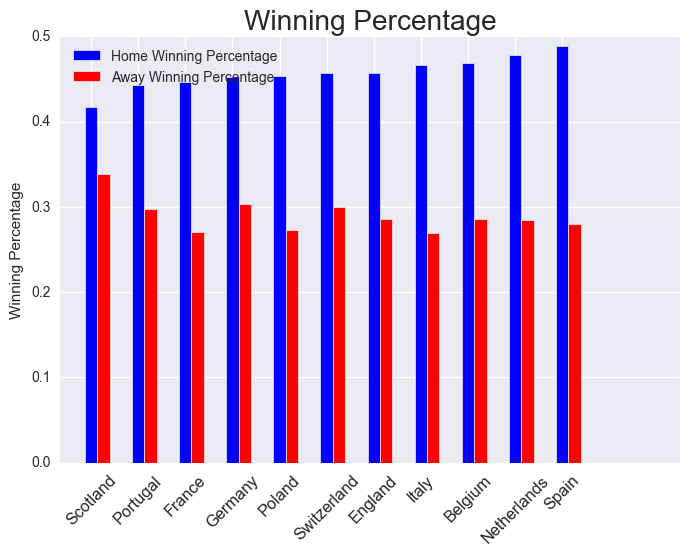

In [11]:
#print(Home_dict)
plt.figure()
plt.hold(True)
l = sorted(Home_dict, key= Home_dict.get)
y1 = []
y2 = []
for country in l:
    y1.append(Home_dict[country])
    y2.append(Away_dict[country])

#print(y1)
#print(y2)
plt.style.use('fivethirtyeight')
plt.bar(np.linspace(1,20,len(countries)),y1, width = 0.5, color = 'blue')
plt.bar(np.linspace(1,20,len(countries)) + 0.5*np.ones(len(countries)),y2, width = 0.5, color = 'red')
plt.xticks(np.linspace(1,20,len(countries))+0.25*np.ones(len(countries)) , l, size='small',rotation= 45)
plt.ylabel('Winning Percentage')
plt.title('Winning Percentage')
plt.legend(['Home Winning Percentage ','Away Winning Percentage'], loc = 2)
plt.show()

#### Spain, Netherland, Belgium and Italy leagues have the highest home advantage. While Scotland league the lowest home advantage

# Interesting Features

The dataset contained quite a few interesting findings ranging from team compositions to player skillsets to predictability between leagues. Our first observation was on how home field seems to result in a slight advantage to any team. Even with high profile teams mostly composed with non-native players with less of an emotional attachment to the local culture, the home field seem to give an advantage. 

We also noticed that offensive skillsets were more valued in the professional leagues than defensive skillsets. Furthermore, certain aspects of ball handling and physical features were more prevalent than others where some attributes showed a clear linear relationship to a player’s rating as shown in visualizations above.

As for the team compositions, we saw that certain classifications were strongly preferred by teams than others. This is clearly noticeable in classes such and Play Dribbling, Play passing and defensive line-up classes. Uniform preference to this pattern was noticed across all leagues as if to suggest that the vast majority of teams follow the same blueprint in maintaining its structure and character. Perhaps teams are reluctant to deviate from this structure fearing subsequent exploitable mismatches from opponents.

# Other Features That Could Be Added

While this dataset was quite through and clean, there were some feature that would have added more value to it. One such feature would have been more financial statistics such as player salaries and team salary structures. Profitability being one of the key motivations in all professional leagues, this type of data would have made it possible to model return on investments better.

Some other adjustments would have been adding league affiliations in the player table itself as well as player injury statistics. Player character and risk profiles would have also enhanced the player dataset.

Finally adding coaching personal and styles could have also completed the dataset.

# Exceptional work 

We noticed that the Spanish league had an unusual goal difference in home field games. This was only observed in the Spanish league and was a pattern that was not noticed on other leagues.

While this unusual phenomenon might be slightly influenced by the two Spanish powerhouses Barcelona and Real-Madrid, with deep pockets and talented players, further analysis is warranted to see if any improper activity might explain this trend.

# References 
1. https://en.wikipedia.org/wiki/Oldest_football_clubs 
2. https://www.kaggle.com/drgilermo/d/hugomathien/soccer/home-advantage-by-country
3. https://www.kaggle.com/hugomathien/soccer
4. http://www.football-data.co.uk/notes.txt